AirBnb
The goal of this project is to predict Airbnb's users first location that is booked using user demographic and activity information. This is actually a kaggle competition, so the data is taken from there. The features that will be reviewed for validity in the prediction will be demographic data, timestamp activity on the website, devices used, browsers, affiliate information, language preferences. I will expand on this goal by also trying to predict the amount of 


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [7]:
loc = r"C:\Users\user\Desktop\kagglehelp\airbnb"
tr_users=pd.read_csv(loc+"\\train_users_2.csv")

In [8]:
tr_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [9]:
# Columns that need to be encoded 
cols_enc=['gender', 'signup_method', 'language', 'affiliate_channel',
          'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
          'first_device_type', 'first_browser' ]

y_enc='country_destination'


In [10]:
# transform label type columns for usability in pandas
tr_users.dtypes
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
# Label encoder applies a numeric label. inverse_transform - transforms it back
# tr_users=tr_users.apply(LabelEncoder().fit_transform)

# Encodes all columns and creates a seperate encoding function for each
enc_lib={}
tr_users_adj=tr_users.copy(deep=True)
# Label encode
for i in tr_users[cols_enc]:
    enc_lib[i]=LabelEncoder().fit(tr_users[i])
    tr_users_adj[i]=enc_lib[i].transform(tr_users[i])
    
# One hot encode, then transform into dataframe to join to training dataset
enc_onehot=OneHotEncoder()
tr_users_onehot=enc_onehot.fit_transform(tr_users_adj[cols_enc])
cols=[cols_enc[i]+'_'+str(j) for i in range(0,len(cols_enc)) for j in range(0, enc_onehot.n_values_[i])]
# print cols
tr_users_onehot=pd.DataFrame(tr_users_onehot.toarray(), columns=cols)

train=tr_users.drop(cols_enc,1).copy(deep=True)
train[cols]=tr_users_onehot[cols]

C:\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
C:\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


In [11]:
# create month and year variables
train["date_account_created"]=pd.to_datetime(tr_users_adj["date_account_created"])
train["date_first_booking"]=pd.to_datetime(tr_users_adj["date_first_booking"])
train["month_created"]=pd.to_datetime(tr_users_adj["date_account_created"]).dt.month
train["year_created"]=pd.to_datetime(tr_users_adj.date_account_created).dt.year
# train.dtypes

In [12]:
# create months and years for timestamp_first_active
tfa=np.vstack(tr_users_adj["timestamp_first_active"].astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
train.tfa_year=tfa[:,0]
train.tfa_month=tfa[:,1]
train.tfa_day=tfa[:,2]
train=train.drop('timestamp_first_active', axis=1)


In [14]:
# remove impossible age values
for k,v in tr_users.age.iteritems():
#     print k
    if tr_users['age'][k]>100:
        tr_users.loc[k,'age']=np.NaN
#     if k % 10000 == 0:
#         print k
#         print tr_users_plt['age'][k]
        
#     tr_users_plt['age'>100]=np.nan


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


In [16]:
# export the new ages because it takes some time to run
import csv
with open(loc+'\\ages.csv', 'wb') as f:
    writer=csv.writer(f)
    writer.writerow(['Age'])
    for i in tr_users.age:
        writer.writerow([str(i)])
    

In [13]:
# reimport ages and then convert nulls to zero's
ages=pd.read_csv(loc+'\\ages.csv')

ages.head()
for k,v in ages['Age'].iteritems():
    if pd.isnull(ages.Age[k]):
        ages.loc[k, 'Age']=0

ages.Age[0]
train['age']=ages['Age']

In [14]:
# split the data into arrays
# call classifier
# cross val score


# reorder tr_users_adj
reorder_col=[col for col in train if col not in ['country_destination', 'date_first_booking']]+['date_first_booking', 'country_destination']
train=train[reorder_col]



# split x and y data 
y=train.values[:,-1]
X=train.values[:,2:-3]
y_train=np.array(y).tolist()
X_train=np.array(X).tolist()





In [15]:
# fit the naive bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
clf=GaussianNB()
clf.fit(X_train, y_train)

# predict from the model
# pred=clf.predict(X_test)

# mean accuracy on test data and labels
# clf.score(X_test,y_test)
print np.mean(cross_val_score(clf, X_train, y_train))


0.0170617703459


In [16]:
from sklearn.ensemble import RandomForestClassifier

clf2=RandomForestClassifier()
print np.mean(cross_val_score(clf2, X_train, y_train))
# this score tells me that Random forsts is the way to go!

0.540265223187


Lets do some exploratory mapping and take some features that we believe will affect the country destination

In [47]:
from pandas.tools.plotting import scatter_matrix
print pd.unique(tr_users_adj.country_destination)
tr_users_es=tr_users_adj.copy(deep=True)
tr_users_es=tr_users_es[tr_users_es.country_destination=='ES']
tr_users_it=tr_users_adj.copy(deep=True)
tr_users_it=tr_users_it[tr_users_it.country_destination=='IT']


['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000C366C160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000C3DB92B0>]], dtype=object)

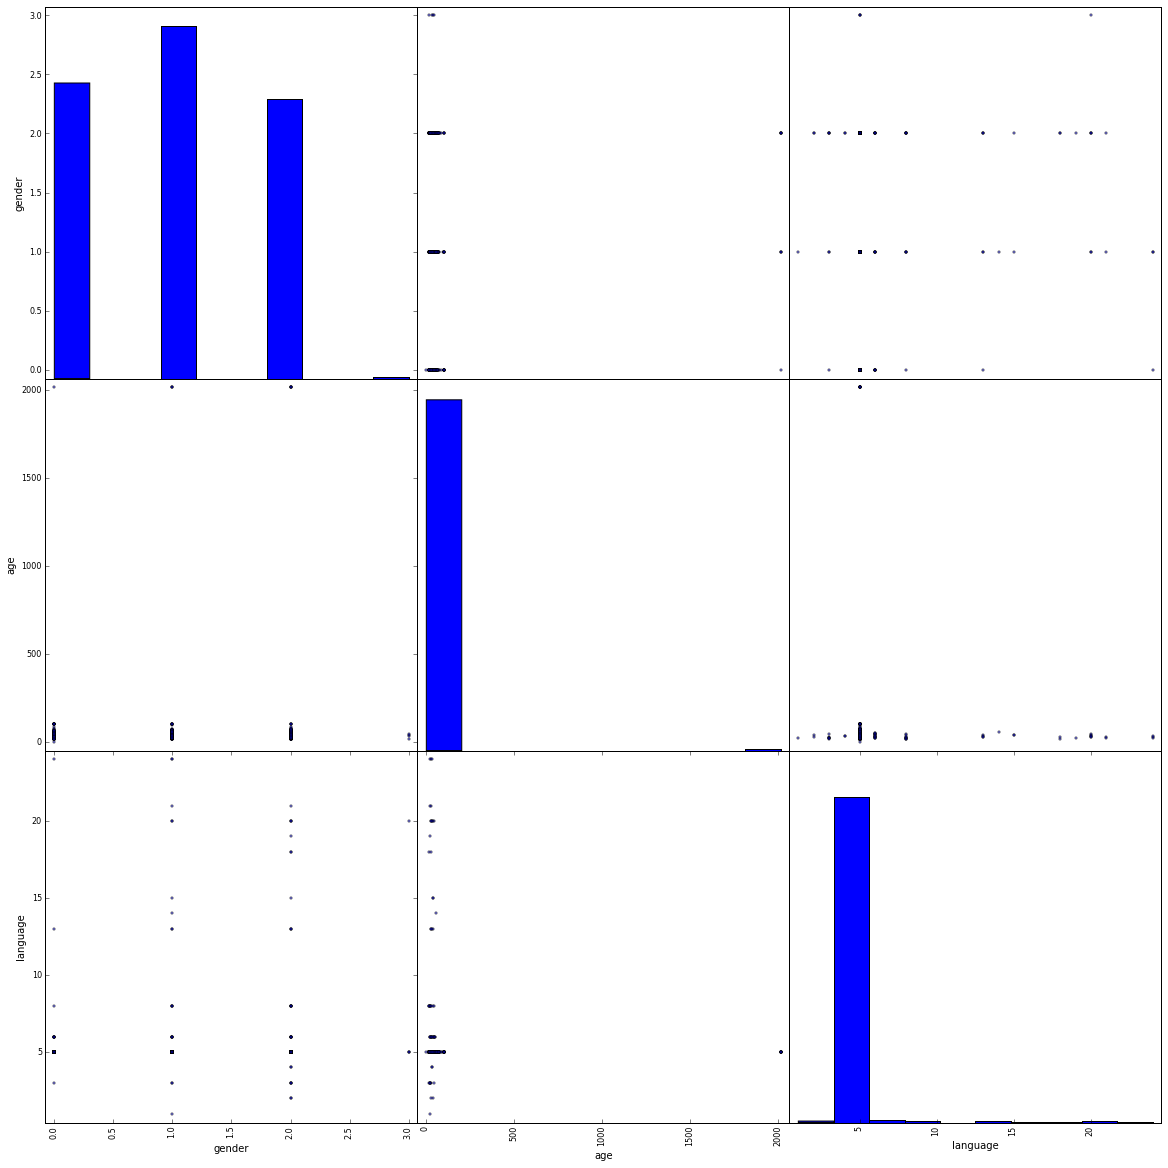

In [45]:
%matplotlib inline

scat_es=scatter_matrix(tr_users_es[['gender', 'age', 'language', 'country_destination']],
                   figsize=(20,20))

scat_es


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000C6663438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000C6D10D68>]], dtype=object)

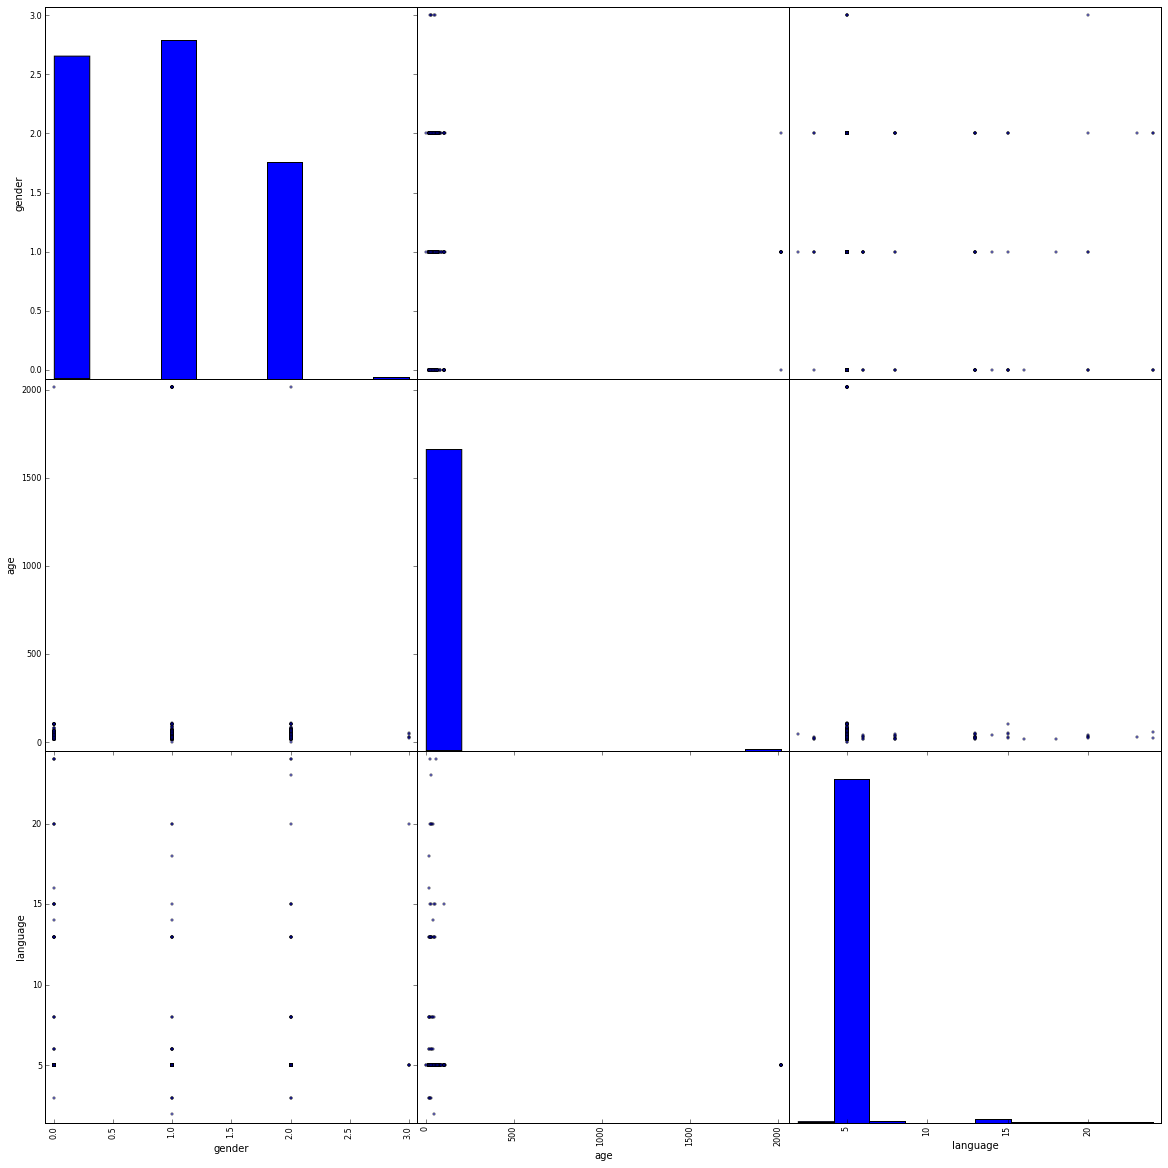

In [48]:
scat_it=scatter_matrix(tr_users_it[['gender', 'age', 'language', 'country_destination']],
                   figsize=(20,20))

scat_it

In [39]:
# import the test data

test=pd.read_csv(loc+'//test_users.csv')
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [48]:
enc_lib['signup_method'].transform(test['signup_method'])

ValueError: y contains new labels: ['weibo']

In [42]:
test_adj=test
# for i in test[cols_enc]:
cols_enc2=['gender', 'signup_method']
for i in test[cols_enc2]:
    print i
    test_adj[i]=enc_lib[i].transform(test[i])
# test_adj.head()

gender


ValueError: LabelEncoder was not fitted yet.

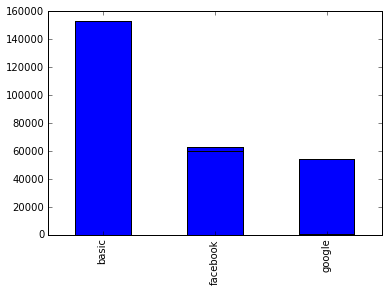

In [81]:
tr_users.gender.value_counts()

# plt.figure(1)
# plt.subplot(211)
# plt.title('gender')
p1=tr_users.gender.value_counts().plot(kind='bar')
# p1.xticks(range(len(tr_users.gender.values())), tr_users.gender.values(), rotation=90)
# plt.subplot(212)
p2=tr_users.signup_method.value_counts().plot(kind='bar')


In [ ]:
lang_count_plt=plt()
